## HELP International with PCA Kmeans and Heirarchical Clustering

### Importing and Merging Data

In [244]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
# Importing all datasets
country = pd.read_csv("C:\\Users\\Tamilvanan\\Desktop\\Machine learning\\Country-data.csv",  sep = ',',encoding = "ISO-8859-1")

In [246]:
print(len(country))

167


### Let's understand the structure of our dataframe

In [247]:
# Let's see the head of our master dataset
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [248]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Data Preparation

In [249]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


Now we can see we have all variables as integer.

### Checking for Outliers

In [250]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [251]:
# Checking for outliers in the continuous variables
country_con = country[[ 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

In [252]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
country_con.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


Outlier treatment isn't needed for this method as it might affect final outcome of the country list that needed help.

### Checking for Missing Values and Inputing Them

In [253]:
# Checking the percentage of missing values
round(100*(country_con.isnull().sum()/len(country_con.index)), 2)

child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

Now we don't have any missing values

### Feature Standardisation

In [254]:
normalized_df=(country_con-country_con.mean())/country_con.std()
normalized_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


### PCA on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!

In [255]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [256]:
pca.fit(normalized_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [257]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [258]:
colnames = list(normalized_df.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income


##### Plotting for visulization of components

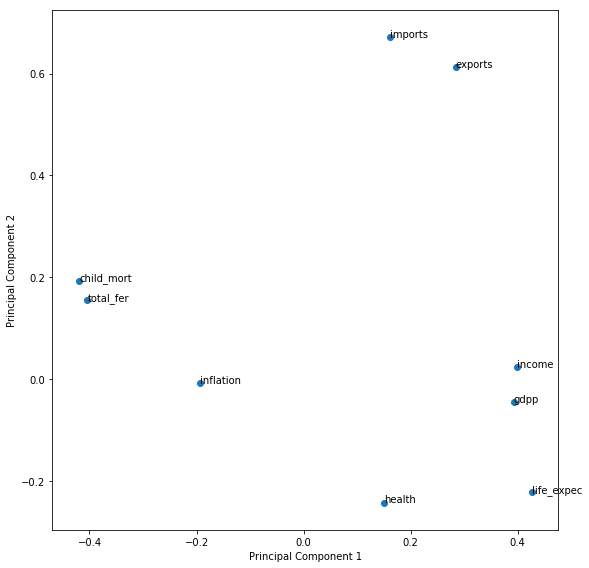

In [259]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Looking at the screeplot to assess the number of needed principal components

In [260]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

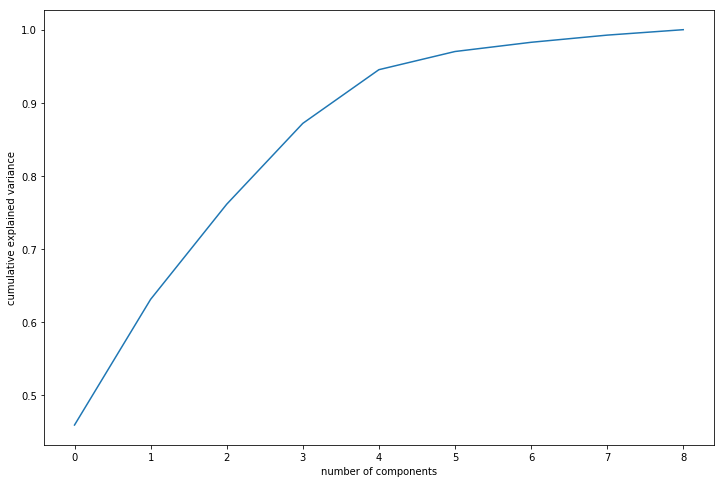

In [261]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 5 components are enough to describe 95% of the variance in the dataset
- We'll choose 5 components for our modeling

In [262]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [263]:
df_normalized_pca = pca_final.fit_transform(normalized_df)
df_normalized_pca.shape

(167, 5)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [264]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_normalized_pca.transpose())

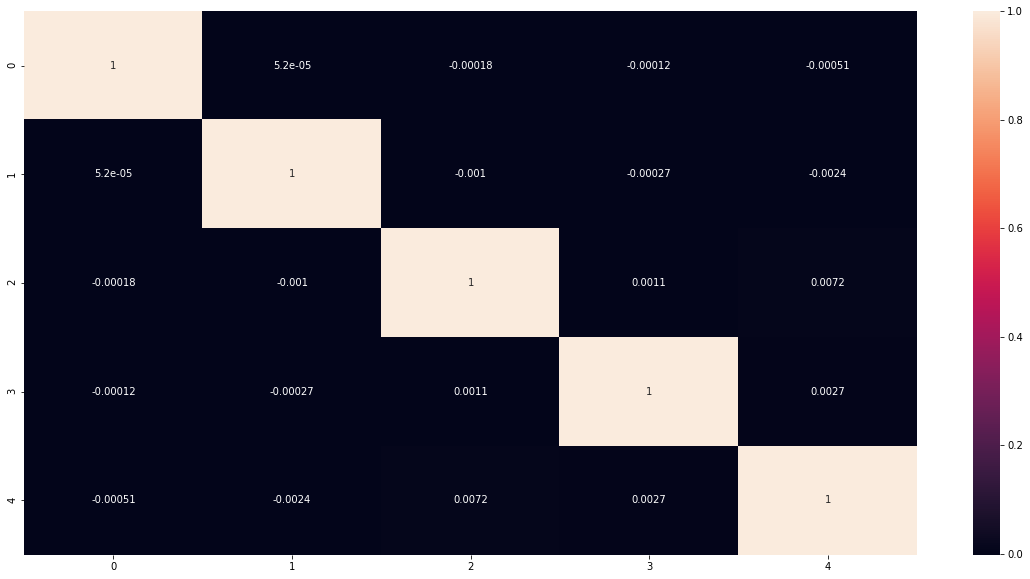

In [265]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [266]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0071945430604919034 , min corr:  -0.002374704497495706


#### Indeed - there is no correlation between any two components!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

# K-Mean Clustering

In [267]:
#Importing Libraries
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [268]:
df_normalized_pca

array([[-2.90426527e+00,  9.16936772e-02, -7.19079824e-01,
         9.98833692e-01, -1.46324633e-01],
       [ 4.28580914e-01, -5.87605765e-01, -3.27625666e-01,
        -1.16152055e+00,  1.52745853e-01],
       [-2.84433307e-01, -4.50782980e-01,  1.22835623e+00,
        -8.55194999e-01,  1.90653759e-01],
       [-2.92391984e+00,  1.69367677e+00,  1.52050306e+00,
         8.53029988e-01, -2.14133956e-01],
       [ 1.03027289e+00,  1.33451378e-01, -2.16049426e-01,
        -8.44099006e-01, -1.92606979e-01],
       [ 2.28217067e-02, -1.76741994e+00,  8.61907325e-01,
        -3.66364323e-02,  9.94903057e-01],
       [-1.01158926e-01, -5.65616877e-01,  2.47363000e-01,
        -1.46162757e+00, -8.55745583e-02],
       [ 2.33513030e+00, -1.98374355e+00,  1.98198980e-01,
         1.11007405e+00, -7.08522888e-01],
       [ 2.96492402e+00, -7.32947745e-01, -5.26700304e-01,
         1.19749986e+00,  7.99261337e-02],
       [-1.80759205e-01, -3.95704713e-01,  8.65795034e-01,
        -4.33896455e-01

In [269]:
df_kmeans = pd.DataFrame(df_normalized_pca)

In [270]:
df_kmeans.head()

,0,1,2,3,4
0,-2.904265,0.091694,-0.719080,0.998834,-0.146325
1,0.428581,-0.587606,-0.327626,-1.161521,0.152746
2,-0.284433,-0.450783,1.228356,-0.855195,0.190654
3,-2.923920,1.693677,1.520503,0.853030,-0.214134
4,1.030273,0.133451,-0.216049,-0.844099,-0.192607


## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [271]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [272]:
hopkins(df_kmeans)

0.8518871763264158

##### from hopkins statistics we get to know there is high tendency in clusters.

In [273]:
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(df_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [274]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_kmeans)
    sse_.append([k, silhouette_score(df_kmeans, kmeans.labels_)])

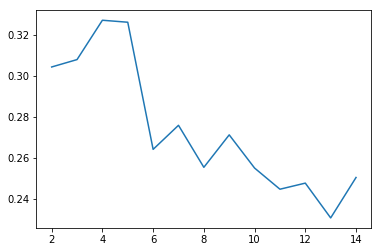

In [275]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

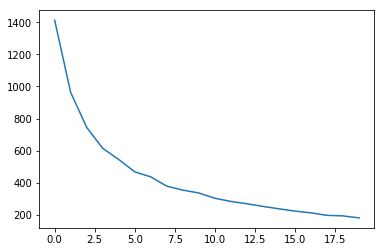

In [276]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_kmeans)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_kmeans = standard_scaler.fit_transform(df_kmeans)

In [277]:
# analysis of clusters formed
country.index = pd.RangeIndex(len(country.index))

In [278]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [279]:
df_km = pd.concat([country, pd.Series(model_clus5.labels_)], axis=1)
df_km.columns = ['country', 'child_mort','exports', 'health','imports','income','inflation', 'life_expec','total_fer','gdpp','ClusterID']

Creating dataframes for all variables

In [280]:
km_clusters_child_mort = 	pd.DataFrame(df_km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(df_km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(df_km.groupby(["ClusterID"]).health.mean())
km_clusters_income = 	pd.DataFrame(df_km.groupby(["ClusterID"]).income.mean())
km_clusters_imports = 	pd.DataFrame(df_km.groupby(["ClusterID"]).imports.mean())
km_clusters_inflation = 	pd.DataFrame(df_km.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(df_km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(df_km.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(df_km.groupby(["ClusterID"]).gdpp.mean())

In [281]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_child_mort,km_clusters_exports,km_clusters_health,km_clusters_income,km_clusters_imports,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean","exports_mean","health_mean","income_mean","imports_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,income_mean,imports_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,21.389655,41.290678,6.235862,12968.620690,48.038689,7.413460,72.935632,2.286552,6919.103448
1,1,92.156522,29.235000,6.417174,3916.152174,42.865217,10.020109,59.158696,4.990000,1913.521739
2,2,4.953333,45.826667,9.168667,45250.000000,39.736667,2.742200,80.376667,1.795333,43333.333333
3,3,4.133333,176.000000,6.793333,64033.333333,156.666667,2.468000,81.433333,1.380000,57566.666667
4,4,130.000000,25.300000,5.070000,5150.000000,17.400000,104.000000,60.500000,5.840000,2330.000000


### Plotting grap for analysis

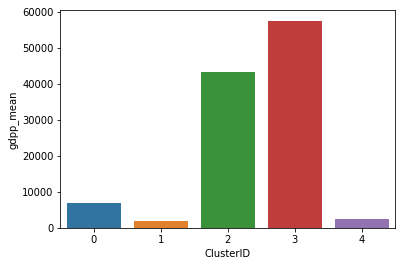

In [282]:
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)

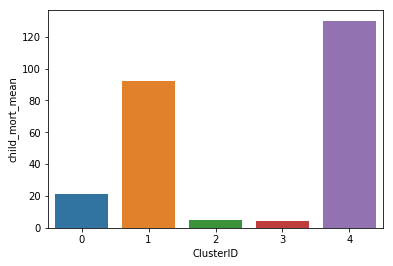

In [283]:
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)


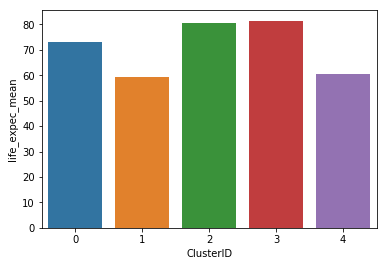

In [284]:
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)


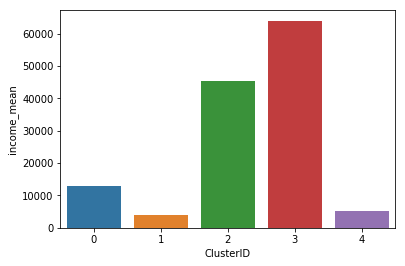

In [285]:
sns.barplot(x=df.ClusterID, y=df.income_mean)


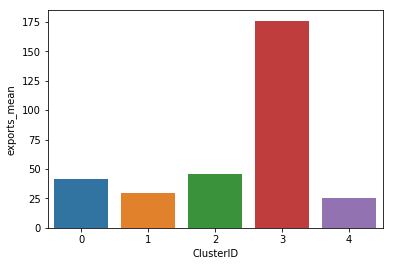

In [286]:
sns.barplot(x=df.ClusterID, y=df.exports_mean)

## Inference
from above charts it simplify that cluster 4 & 1 having very low income, gdpp, life expectency,export and high child mortality rate.

In [287]:
df_km[df_km.ClusterID == 4]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,4


In [288]:
df_km[df_km.ClusterID == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1


### combining clusters 1 and 4 to create resultant countries that needed help

In [289]:
kcluster1 = df_km[df_km.ClusterID==1].country
kcluster4 = df_km[df_km.ClusterID==4].country
Kmeans_result= pd.concat([kcluster1,kcluster4], axis=0)

In [290]:
Kmeans_result.count()

47

## Heirarchical clustering

##### we used two methods of linkages complete and single

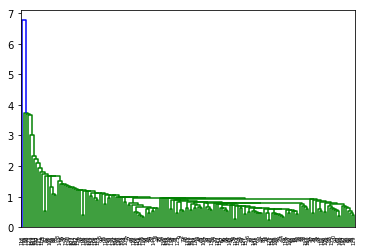

In [291]:
# heirarchical clustering
mergings = linkage(df_kmeans, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

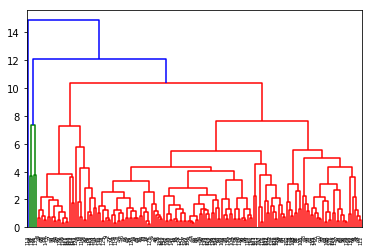

In [292]:
mergings = linkage(df_kmeans, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [293]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
hier_hc = pd.concat([country, clusterCut], axis=1)
hier_hc.columns = ['country', 'child_mort','exports', 'health','imports','income','inflation', 'life_expec','total_fer','gdpp','ClusterID']

In [294]:
hier_hc.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID'],
      dtype='object')

#### creating data frames for varaible means

In [295]:
km_clusters_child_mort = 	pd.DataFrame(hier_hc.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(hier_hc.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(hier_hc.groupby(["ClusterID"]).health.mean())
km_clusters_income = 	pd.DataFrame(hier_hc.groupby(["ClusterID"]).income.mean())
km_clusters_imports = 	pd.DataFrame(hier_hc.groupby(["ClusterID"]).imports.mean())
km_clusters_inflation = 	pd.DataFrame(hier_hc.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(hier_hc.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(hier_hc.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(hier_hc.groupby(["ClusterID"]).gdpp.mean())

In [296]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_child_mort,km_clusters_exports,km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,96.000000,30.537368,7.028684,47.913158,3508.763158,8.198553,57.884211,5.061579,1793.342105
1,1,25.538298,38.631691,6.183511,45.263467,11871.063830,7.979511,72.460638,2.455106,6878.053191
2,2,6.190000,47.543333,8.701000,38.660000,46543.333333,4.358433,79.790000,1.901333,42150.000000
3,3,6.700000,155.450000,5.945000,144.500000,53125.000000,0.798500,79.425000,1.577500,45875.000000
4,4,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


### Plotting based on cluster id's for finding resultant clusters

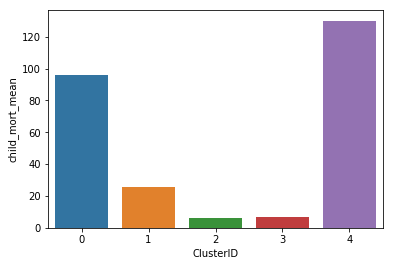

In [297]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)

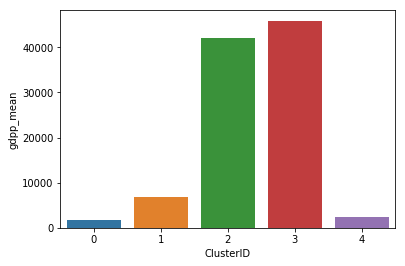

In [298]:
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)

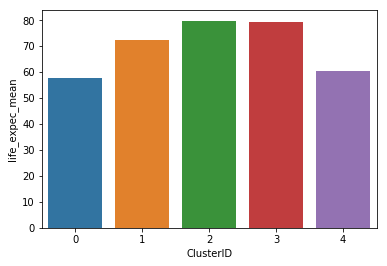

In [299]:
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)

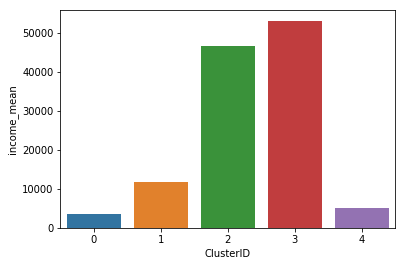

In [300]:
sns.barplot(x=df.ClusterID, y=df.income_mean)

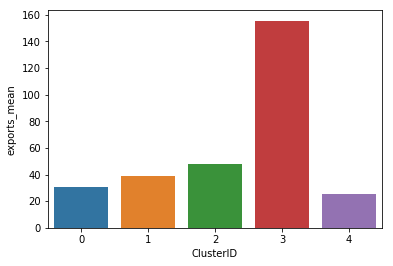

In [301]:
sns.barplot(x=df.ClusterID, y=df.exports_mean)

From above charts its clear that clusters 0 and 4 are found to be needed of dire help.

#### Combining clusters 0 & 4 for list of countries

In [302]:
hier_hc[hier_hc.ClusterID == 4]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,4


In [303]:
hcluster0 = hier_hc[hier_hc.ClusterID==0].country
hcluster4 = hier_hc[hier_hc.ClusterID==4].country
hier_result= pd.concat([hcluster0,hcluster4], axis=0)

## Combining both clustering results for finilazing country list:

After combining checkking and removing duplicates if present any.

In [304]:
Result_countries = pd.concat([hier_result,Kmeans_result],axis=0,ignore_index =True)
Result_countries.columns = ["Country"]

In [305]:
Result_countries.count()

86

In [306]:
hier_result.count()

39

In [307]:
Kmeans_result.count()

47

#### Removing duplicates from data frame

Removing duplicates and saving in new data frame

In [308]:
Result_countries1 = Result_countries.drop_duplicates()

#### Checking for duplicates

In [309]:
Result_countries1.duplicated().sum()

0

#### final list of countries in below dataframe- Result_countries1

In [310]:
Result_countries1.count()

49

In [311]:
Result_countries1 = Result_countries1.reset_index(drop=True)

In [312]:
Result_countries1

0                  Afghanistan
1                       Angola
2                        Benin
3                     Botswana
4                 Burkina Faso
5                      Burundi
6                     Cameroon
7     Central African Republic
8                         Chad
9                      Comoros
10            Congo, Dem. Rep.
11                 Congo, Rep.
12               Cote d'Ivoire
13           Equatorial Guinea
14                      Gambia
15                      Guinea
16               Guinea-Bissau
17                       Haiti
18                       Kenya
19                    Kiribati
20                     Lesotho
21                     Liberia
22                      Malawi
23                        Mali
24                  Mauritania
25       Micronesia, Fed. Sts.
26                  Mozambique
27                     Namibia
28                       Niger
29                      Rwanda
30                     Senegal
31                Sierra Leone
32      